# Project 2D: K-means and Cluster Plot

## Scientific Question: Are IL-6 and STAT3 gene both over expressed in acute inflammation in adult humans?
IL-6, or interleukin 6, is a notable cytokine that is involved in immune responses and inflammation. Over expression of IL-6 is linked to chronic inflammation and autoimmunity. STAT3, known as Signal Transducer And Activator Of Transcription 3, is a gene that is a component of the interleukin-6 activated acute phase response factor (APRF) complex. This complex plays a crucial role in stimulating the expression of innate immune mediators in the liver. In a study of IL-6 treated colon cancer cells, IL-6 activates STAT3 through phosphorylation. Prolonged STAT3 activation leads to the proliferation of proteins that play roles in inflammation and cancer progression (Wang Y 2013). 

Access to data can be found on the NCBI SRA database: https://www.ncbi.nlm.nih.gov/sra/?term=IL-6+STAT3. 
"Sequence Read Archive (SRA) data, available through multiple cloud providers and NCBI servers, is the largest publicly available repository of high throughput sequencing data. The archive accepts data from all branches of life as well as metagenomic and environmental surveys. SRA stores raw sequencing data and alignment information to enhance reproducibility and facilitate new discoveries through data analysis."


## Scientific Hypothesis: If IL-6 is over expressed in acute inflammation, then STAT3 and IL-6 interactions should occur that causes over activation of STAT3.
RNA seq data can be clustered using a method called K-means clustering. Clustering gene expression data provides a visual of gene groups that behave similarly. For example, clustering can depict gene groups that are co-functional, or share a biological function. To support my scientific hypothesis, the k-mean cluster plot should visually show STAT3 and IL-6 not only share a biological function but also show that STAT3 is over expressed when interacting with IL-6. 
To answer the scientific question and test my hypothesis, I searched for "IL-6 STAT3" on NCBI SRA database and found a paper that included an excel file containing data from RNA seq on gene expression levels from a sample of mice hepatocytes when treated in IL-6 and IL-1B. There are over 3200 genes listed in the data, with STAT3 included as one of them. The k-means from the excel file will be analyzed as the bioinformatics method, and the cluster plot will be the visualization method. The points, centroids, and distances of the centroids will be calculated and then will be plotted onto a cluster plot which groups genes based on the differential gene expressions treated with IL-6 and IL-1.

## Part 1: Imports

pandas: pandas is a Python library used for data analysis and manipulation. It is capable of importing data from various file formats such as CSV, JSON, SQL, and Microsoft Excel. Some of pandas' features are data alignment and integrated handling of missing data, Label-based slicing, indexing, and subsetting of large data sets, and data filtration. For this project pandas is used to read and import an Excel file containing data. To learn more about pandas visit https://pandasguide.readthedocs.io/en/latest/.

numpy: numpy is a Python library that supports large, multi-dimensional arrays and matrices. Some of numpy's features are constructing N-dimensional arrays, conducting high-level mathematical functions, and providing knowledge of the data type of an array using dtype(). NumPy can also combine with other Python packages like SciPy and matplotlib. Numpy is used here to create arrays proving points and centroids for the cluster plot. For more information on numpy visit https://numpy.readthedocs.io/.

scipy: scipy is Python library used for scientific and technical computing. SciPy contains modules used for science and engineering tasks such as for optimization, linear algebra, integration, and signal and image processing. Some of scipy's features are hierarchical clustering, sparse matrices and statistical functions. Here a scipy subpackage, scipy.spatial.distance, is used to calculate the distances for the centroids. For more information on scipy visit https://readthedocs.org/projects/scipy/.

sklearn: sklearn is a Python library for machine learning. Some of its features are classification, regression and clustering algorithms. It also uses other Python numerical and scientific libraries such as NumPy and SciPy. For this project, the subpackages sklearn.cluster was used to analyze the k-means. To learn more about sklearn visit https://github.com/scikit-learn/scikit-learn.

matplotlib: matplotlib is a Python library used for plotting. It closely resembles MATLAB. Some of matplotlib's features are creating various graphs such as scatter plots, line plots, and histograms. Here matplotlib was used to plot the k-means cluster plot. For more information on matplotlib visit https://github.com/matplotlib/matplotlib.

In [60]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Part 2: Load data and perform k-means analysis

In [61]:
#define the local variable df
#use pandas read function to read raw excel sheet containing k-means data
#print df to check

In [62]:
df = pd.read_excel(r"C:\Users\16197\Downloads\41467_2017_2055_MOESM3_ESM (1).xlsx")
print(df)

     Supplementary Data 1: All cytokine-regulated genes, k-means clustered (k = 4)  \
0                                                   NaN                              
1                                               gene_id                              
2                                         1300014I06Rik                              
3                                         1700001G17Rik                              
4                                         1700016G22Rik                              
...                                                 ...                              
3257                                              Zmiz2                              
3258                                              Zmym3                              
3259                                              Zrsr1                              
3260                                             Zscan2                              
3261                                             Zyg11

In [222]:
#after importing our data, we can now start k-means analysis
#define our function kmeans using Python's def function
def kmeans(df, k): 
    #using the scipy.spatial.distance subpackage, find the distance between centroids and all the data points using euclidean distance, store as local variable distances
    distances = cdist(df, centroids ,'euclidean')
    
    #determine centroid with the minimum distance using numpy array, store as local variable points
    points = np.array([np.argmin(i) for i in distances])
     
    #repeat the above step for a defined number of iterations using a for loop
    for df in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #updating centroids by taking mean of cluster it belongs to
            temp_cent = [points==idx].mean(axis=0) 
            centroids.append(temp_cent)
        #create local variables for centroid, distances, and points
        centroids = np.vstack(centroids) #(Updated centroids) 
        distances = cdist(df, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    #return points using return statement
    return points
#printing the following: centroids, distances, points
print(centroids)
print(distances)
print(points)

[]
[[33.81034633  5.98505396 21.83355003 27.98010168]
 [11.01049989 39.91510223 33.37848961 27.00378023]
 [ 6.76707903 29.05944764 25.58708521 18.70938655]
 ...
 [11.49920215 26.74626472 27.54709842 13.91129861]
 [25.5203688  11.24407775 12.85116084 26.66772683]
 [18.87307061 13.42626694 14.37179998 20.75959872]]
[1 0 0 ... 0 1 1]


## Part 3: Display k-means cluster plot

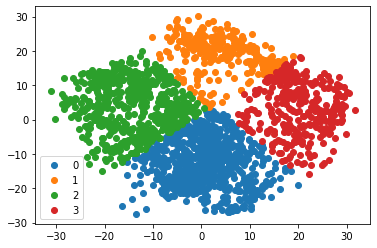

In [214]:
#plotting the results:
#create local variable u_label using numpy function numpy.unique
u_labels = np.unique(label)
#use for loop plot points
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#provide legend for plot
plt.legend()
#show final result
plt.show()

## Part 4: Analysis

The K-means clustering algorithm was used to find groups which have not been explicitly labeled in the data. K-means clustering was used to quantify differentially expressed genes of mice hepatocytes to determine what groups of genes behave similarily or differently during the acute phase of inflammation. The cluster plots reveals an intricate crosstalk between pro-inflammatory cytokines IL-6 and IL-1. The number of groups is represented by K. In total there are four groups of K as shown in different colors on the plot. Blue indicated a k-mean of 1, yellow is 2, green is 3, and red is 4. The numbers on the x and y axis represent the levels of differential expression of genes. STAT3, with a k-mean of 1, showed expression when treated with just IL-6. STAT3 showed a higher expression when treated with IL-1. My hypothesis was correct because STAT3 expression was induced with treatment of IL-6. The limitation of this analysis is that the sample was derived from mice hepatocytes. Using human hepatocytes may reveal a different observation. 

## References

Wang Y, H. van Boxel-Dezaire AH, Cheon HJ, Yang J, Stark GR (2013) “STAT3 activation in response to IL-6 is prolonged by the binding of IL-6 receptor to EGF receptor” PNAS 110 (42) 16975-16980. https://www.pnas.org/content/110/42/16975

Goldstein I. (2017) "Synergistic gene expression during the acute phase response is characterized by transcription factor assisted loading" Nature Communications Volume 8, Article number: 1849. https://www.nature.com/articles/s41467-017-02055-5

https://pandasguide.readthedocs.io/en/latest/

https://numpy.readthedocs.io/

https://readthedocs.org/projects/scipy/

https://github.com/scikit-learn/scikit-learn

https://github.com/matplotlib/matplotlib

https://realpython.com/k-means-clustering-python/

https://www.askpython.com/python/examples/k-means-clustering-from-scratch